## TOC

1. [Basic Statistics](#BasicStats)<br>
2. [Detailed Plots](#DetailedPlots)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [2]:
def get_out_file_names(folder:str)->list:
    return glob.glob(f"{folder}/*.out", recursive=True)

def get_csv_file_names(folder:str)->list:
    return glob.glob(f"{folder}/*.csv", recursive=True)

def get_basic_data(filename:str)->tuple:
    fields = ["Best Distance: ", "Process Time: ", "Wall Time: "]
    t = []
    with open(filename, "r") as f:
        lines = [line.strip() for line in f.readlines()]
        for field in fields:
            for line in lines:
                if line.startswith(field):
                    t.append(float(line[len(field):]))
    return tuple(t)

def get_out_df(filenames:list, is_cached:bool)->pd.DataFrame:
    insts = ["inst-0", "inst-13", "inst-5"]
    variants = ["base", "variant1", "variant2"]
    runs = [1, 2, 3, 4, 5]
    df_dict = {
        "cached": [],
        "instance": [],
        "variant": [],
        "run_number": [],
        "best_distance": [],
        "process_time": [],
        "wall_time": [],
    }
    for inst in insts:
        for variant in variants:
            for run in runs:
                filepat = f"{inst}.{variant}.{run}.out"
                for fname in filenames:
                    if filepat in fname:
                        bd, pt, wt = get_basic_data(fname)
                        df_dict['cached'].append(is_cached)
                        df_dict['instance'].append(inst)
                        df_dict['variant'].append(variant)
                        df_dict['run_number'].append(run)
                        df_dict['best_distance'].append(bd)
                        df_dict['process_time'].append(pt)
                        df_dict['wall_time'].append(wt)
    return pd.DataFrame(df_dict)


def get_all_out_files_data_as_dataframe():
    cf = get_out_file_names('cache')
    ncf = get_out_file_names('nocache')
    cdf = get_out_df(cf, True)
    ncdf = get_out_df(ncf, False)
    return cdf, ncdf

def get_description_df(cdf:pd.DataFrame, ncdf:pd.DataFrame):
    df = pd.concat([cdf, ncdf])
    bdf = df[['cached', 'instance', 'variant', 'best_distance']]
    pdf = df[['cached', 'instance', 'variant', 'process_time']]
    pdf2 = df[['cached', 'instance', 'variant', 'process_time']]
    pdf3 = df[['cached', 'instance', 'variant', 'process_time']]
    pdf4 = df[['cached', 'instance', 'variant', 'process_time']]
    bdf = bdf.groupby(by=['instance', 'cached', 'variant']).describe()
    pdf = pdf.groupby(by=['instance', 'variant', 'cached']).describe()
    pdf2 = pdf2.groupby(by=['instance', 'cached', 'variant']).describe()
    pdf3 = pdf3.groupby(by=['cached', 'variant', 'instance']).describe()
    pdf4 = pdf4.groupby(by=['cached', 'variant', 'instance']).describe()
    full_df = df[['cached', 'instance', 'variant', 'best_distance', 'process_time']].\
            groupby(by=['instance', 'cached', 'variant']).describe()
    return full_df, bdf, pdf, pdf2, pdf3, pdf4

def get_df_replaced_with_n_cities(cdf:pd.DataFrame, ncdf:pd.DataFrame)->pd.DataFrame:
    df = pd.concat([cdf, ncdf])
    df['instance'] = df['instance'].map({'inst-0': 184, 'inst-13': 352, 'inst-5': 819})
    #df = df.groupby(by=['variant', 'cached', 'instance']).describe()
    return df

cdf, ncdf = get_all_out_files_data_as_dataframe()
full_description, best_distance_description,\
    process_time_description, process_time_description2,\
    process_time_description3, process_time_description4=\
            get_description_df(cdf, ncdf)

In [3]:
best_distance_description

best_distance                              \
                                 count          mean           std   
instance cached variant                                              
inst-0   False  base               5.0  3.483211e+06  27401.561743   
                variant1           5.0  3.560954e+06  41682.079138   
                variant2           5.0  3.594154e+06  19554.124732   
         True   base               5.0  3.483211e+06  27401.561743   
                variant1           5.0  3.560954e+06  41682.079138   
                variant2           5.0  3.594154e+06  19554.124732   
inst-13  False  base               5.0  6.324916e+06  28343.936094   
                variant1           5.0  6.400748e+06  27786.048108   
                variant2           5.0  6.441843e+06  49424.881214   
         True   base               5.0  6.324916e+06  28343.936094   
                variant1           5.0  6.400748e+06  27786.048108   
                variant2           5.0  6.441843e+06  49424.881214   
inst-5   False  base               5.0  1.115341e+07  36307.619408   
                variant1           5.0  1.135044e+07  54096.755444   
                variant2           5.0  1.143268e+07  74494.355171   
         True   base               5.0  1.115341e+07  36307.619408   
                variant1           5.0  1.135044e+07  54096.755444   
                variant2           5.0  1.143268e+07  74494.355171   

                                                                    \
                                   min           25%           50%   
instance cached variant                                              
inst-0   False  base      3.452940e+06  3.461627e+06  3.486302e+06   
                variant1  3.504536e+06  3.531718e+06  3.579031e+06   
                variant2  3.564625e+06  3.588953e+06  3.594459e+06   
         True   base      3.452940e+06  3.461627e+06  3.486302e+06   
                variant1  3.504536e+06  3.531718e+06  3.579031e+06   
                variant2  3.564625e+06  3.588953e+06  3.594459e+06   
inst-13  False  base      6.305152e+06  6.309133e+06  6.312294e+06   
                variant1  6.364196e+06  6.388281e+06  6.394371e+06   
                variant2  6.397159e+06  6.417805e+06  6.425238e+06   
         True   base      6.305152e+06  6.309133e+06  6.312294e+06   
                variant1  6.364196e+06  6.388281e+06  6.394371e+06   
                variant2  6.397159e+06  6.417805e+06  6.425238e+06   
inst-5   False  base      1.109191e+07  1.115708e+07  1.116426e+07   
                variant1  1.130291e+07  1.131195e+07  1.132049e+07   
                variant2  1.133178e+07  1.140755e+07  1.142711e+07   
         True   base      1.109191e+07  1.115708e+07  1.116426e+07   
                variant1  1.130291e+07  1.131195e+07  1.132049e+07   
                variant2  1.133178e+07  1.140755e+07  1.142711e+07   

                                                      
                                   75%           max  
instance cached variant                               
inst-0   False  base      3.493055e+06  3.522131e+06  
                variant1  3.582463e+06  3.607023e+06  
                variant2  3.607021e+06  3.615712e+06  
         True   base      3.493055e+06  3.522131e+06  
                variant1  3.582463e+06  3.607023e+06  
                variant2  3.607021e+06  3.615712e+06  
inst-13  False  base      6.323959e+06  6.374044e+06  
                variant1  6.425151e+06  6.431742e+06  
                variant2  6.444003e+06  6.525008e+06  
         True   base      6.323959e+06  6.374044e+06  
                variant1  6.425151e+06  6.431742e+06  
                variant2  6.444003e+06  6.525008e+06  
inst-5   False  base      1.116558e+07  1.118821e+07  
                variant1  1.139532e+07  1.142153e+07  
                variant2  1.146176e+07  1.153519e+07  
         True   base      1.116558e+07  1.118821e+07  
                variant1  1.139532e+07

In [4]:
process_time_description

process_time                                        \
                                count         mean         std          min   
instance variant  cached                                                      
inst-0   base     False           5.0    31.896875    2.652516    29.375000   
                  True            5.0    22.584375    0.607228    21.671875   
         variant1 False           5.0     9.818750    0.454013     9.093750   
                  True            5.0     9.728125    0.956104     8.359375   
         variant2 False           5.0    10.412500    0.270543    10.078125   
                  True            5.0     9.996875    0.564925     9.468750   
inst-13  base     False           5.0   205.350000   11.371273   194.328125   
                  True            5.0   157.190625   15.452894   140.203125   
         variant1 False           5.0    32.237500    3.301156    29.187500   
                  True            5.0    34.656250    3.655849    30.671875   
         variant2 False           5.0    33.906250    1.252244    32.828125   
                  True            5.0    35.634375    3.590821    32.062500   
inst-5   base     False           5.0  2089.825000   61.155074  2010.734375   
                  True            5.0  1588.146875  144.123185  1449.703125   
         variant1 False           5.0   159.081250    6.889884   148.125000   
                  True            5.0   231.759375  118.888956   154.671875   
         variant2 False           5.0   164.768750   10.036672   153.875000   
                  True            5.0   242.734375  109.046306   161.468750   

                                                                              
                                  25%          50%          75%          max  
instance variant  cached                                                      
inst-0   base     False     30.828125    30.968750    31.968750    36.343750  
                  True      22.500000    22.625000    22.765625    23.359375  
         variant1 False      9.671875    10.031250    10.062500    10.234375  
                  True       9.453125     9.812500    10.015625    11.000000  
         variant2 False     10.203125    10.484375    10.546875    10.750000  
                  True       9.656250     9.781250    10.187500    10.890625  
inst-13  base     False    195.218750   202.734375   215.859375   218.609375  
                  True     151.125000   154.703125   157.765625   182.156250  
         variant1 False     30.109375    30.734375    33.968750    37.187500  
                  True      30.921875    35.687500    37.671875    38.328125  
         variant2 False     33.296875    33.515625    33.843750    36.046875  
                  True      32.656250    34.906250    38.062500    40.484375  
inst-5   base     False   2058.875000  2091.343750  2113.625000  2174.546875  
                  True    1517.968750  1560.187500  1583.500000  1829.375000  
         variant1 False    159.578125   160.109375   160.328125   167.265625  
                  True     176.187500   192.031250   193.312500   442.593750  
         variant2 False    155.390625   168.218750   168.546875   177.812500  
                  True     205.000000   205.609375   206.843750   434.750000

In [5]:
process_time_description2

process_time                                        \
                                count         mean         std          min   
instance cached variant                                                       
inst-0   False  base              5.0    31.896875    2.652516    29.375000   
                variant1          5.0     9.818750    0.454013     9.093750   
                variant2          5.0    10.412500    0.270543    10.078125   
         True   base              5.0    22.584375    0.607228    21.671875   
                variant1          5.0     9.728125    0.956104     8.359375   
                variant2          5.0     9.996875    0.564925     9.468750   
inst-13  False  base              5.0   205.350000   11.371273   194.328125   
                variant1          5.0    32.237500    3.301156    29.187500   
                variant2          5.0    33.906250    1.252244    32.828125   
         True   base              5.0   157.190625   15.452894   140.203125   
                variant1          5.0    34.656250    3.655849    30.671875   
                variant2          5.0    35.634375    3.590821    32.062500   
inst-5   False  base              5.0  2089.825000   61.155074  2010.734375   
                variant1          5.0   159.081250    6.889884   148.125000   
                variant2          5.0   164.768750   10.036672   153.875000   
         True   base              5.0  1588.146875  144.123185  1449.703125   
                variant1          5.0   231.759375  118.888956   154.671875   
                variant2          5.0   242.734375  109.046306   161.468750   

                                                                              
                                  25%          50%          75%          max  
instance cached variant                                                       
inst-0   False  base        30.828125    30.968750    31.968750    36.343750  
                variant1     9.671875    10.031250    10.062500    10.234375  
                variant2    10.203125    10.484375    10.546875    10.750000  
         True   base        22.500000    22.625000    22.765625    23.359375  
                variant1     9.453125     9.812500    10.015625    11.000000  
                variant2     9.656250     9.781250    10.187500    10.890625  
inst-13  False  base       195.218750   202.734375   215.859375   218.609375  
                variant1    30.109375    30.734375    33.968750    37.187500  
                variant2    33.296875    33.515625    33.843750    36.046875  
         True   base       151.125000   154.703125   157.765625   182.156250  
                variant1    30.921875    35.687500    37.671875    38.328125  
                variant2    32.656250    34.906250    38.062500    40.484375  
inst-5   False  base      2058.875000  2091.343750  2113.625000  2174.546875  
                variant1   159.578125   160.109375   160.328125   167.265625  
                variant2   155.390625   168.218750   168.546875   177.812500  
         True   base      1517.968750  1560.187500  1583.500000  1829.375000  
                variant1   176.187500   192.031250   193.312500   442.593750  
                variant2   205.000000   205.609375   206.843750   434.750000

In [6]:
process_time_description3

process_time                                        \
                                count         mean         std          min   
cached variant  instance                                                      
False  base     inst-0            5.0    31.896875    2.652516    29.375000   
                inst-13           5.0   205.350000   11.371273   194.328125   
                inst-5            5.0  2089.825000   61.155074  2010.734375   
       variant1 inst-0            5.0     9.818750    0.454013     9.093750   
                inst-13           5.0    32.237500    3.301156    29.187500   
                inst-5            5.0   159.081250    6.889884   148.125000   
       variant2 inst-0            5.0    10.412500    0.270543    10.078125   
                inst-13           5.0    33.906250    1.252244    32.828125   
                inst-5            5.0   164.768750   10.036672   153.875000   
True   base     inst-0            5.0    22.584375    0.607228    21.671875   
                inst-13           5.0   157.190625   15.452894   140.203125   
                inst-5            5.0  1588.146875  144.123185  1449.703125   
       variant1 inst-0            5.0     9.728125    0.956104     8.359375   
                inst-13           5.0    34.656250    3.655849    30.671875   
                inst-5            5.0   231.759375  118.888956   154.671875   
       variant2 inst-0            5.0     9.996875    0.564925     9.468750   
                inst-13           5.0    35.634375    3.590821    32.062500   
                inst-5            5.0   242.734375  109.046306   161.468750   

                                                                              
                                  25%          50%          75%          max  
cached variant  instance                                                      
False  base     inst-0      30.828125    30.968750    31.968750    36.343750  
                inst-13    195.218750   202.734375   215.859375   218.609375  
                inst-5    2058.875000  2091.343750  2113.625000  2174.546875  
       variant1 inst-0       9.671875    10.031250    10.062500    10.234375  
                inst-13     30.109375    30.734375    33.968750    37.187500  
                inst-5     159.578125   160.109375   160.328125   167.265625  
       variant2 inst-0      10.203125    10.484375    10.546875    10.750000  
                inst-13     33.296875    33.515625    33.843750    36.046875  
                inst-5     155.390625   168.218750   168.546875   177.812500  
True   base     inst-0      22.500000    22.625000    22.765625    23.359375  
                inst-13    151.125000   154.703125   157.765625   182.156250  
                inst-5    1517.968750  1560.187500  1583.500000  1829.375000  
       variant1 inst-0       9.453125     9.812500    10.015625    11.000000  
                inst-13     30.921875    35.687500    37.671875    38.328125  
                inst-5     176.187500   192.031250   193.312500   442.593750  
       variant2 inst-0       9.656250     9.781250    10.187500    10.890625  
                inst-13     32.656250    34.906250    38.062500    40.484375  
                inst-5     205.000000   205.609375   206.843750   434.750000

In [7]:
process_time_description4

process_time                                        \
                                count         mean         std          min   
cached variant  instance                                                      
False  base     inst-0            5.0    31.896875    2.652516    29.375000   
                inst-13           5.0   205.350000   11.371273   194.328125   
                inst-5            5.0  2089.825000   61.155074  2010.734375   
       variant1 inst-0            5.0     9.818750    0.454013     9.093750   
                inst-13           5.0    32.237500    3.301156    29.187500   
                inst-5            5.0   159.081250    6.889884   148.125000   
       variant2 inst-0            5.0    10.412500    0.270543    10.078125   
                inst-13           5.0    33.906250    1.252244    32.828125   
                inst-5            5.0   164.768750   10.036672   153.875000   
True   base     inst-0            5.0    22.584375    0.607228    21.671875   
                inst-13           5.0   157.190625   15.452894   140.203125   
                inst-5            5.0  1588.146875  144.123185  1449.703125   
       variant1 inst-0            5.0     9.728125    0.956104     8.359375   
                inst-13           5.0    34.656250    3.655849    30.671875   
                inst-5            5.0   231.759375  118.888956   154.671875   
       variant2 inst-0            5.0     9.996875    0.564925     9.468750   
                inst-13           5.0    35.634375    3.590821    32.062500   
                inst-5            5.0   242.734375  109.046306   161.468750   

                                                                              
                                  25%          50%          75%          max  
cached variant  instance                                                      
False  base     inst-0      30.828125    30.968750    31.968750    36.343750  
                inst-13    195.218750   202.734375   215.859375   218.609375  
                inst-5    2058.875000  2091.343750  2113.625000  2174.546875  
       variant1 inst-0       9.671875    10.031250    10.062500    10.234375  
                inst-13     30.109375    30.734375    33.968750    37.187500  
                inst-5     159.578125   160.109375   160.328125   167.265625  
       variant2 inst-0      10.203125    10.484375    10.546875    10.750000  
                inst-13     33.296875    33.515625    33.843750    36.046875  
                inst-5     155.390625   168.218750   168.546875   177.812500  
True   base     inst-0      22.500000    22.625000    22.765625    23.359375  
                inst-13    151.125000   154.703125   157.765625   182.156250  
                inst-5    1517.968750  1560.187500  1583.500000  1829.375000  
       variant1 inst-0       9.453125     9.812500    10.015625    11.000000  
                inst-13     30.921875    35.687500    37.671875    38.328125  
                inst-5     176.187500   192.031250   193.312500   442.593750  
       variant2 inst-0       9.656250     9.781250    10.187500    10.890625  
                inst-13     32.656250    34.906250    38.062500    40.484375  
                inst-5     205.000000   205.609375   206.843750   434.750000

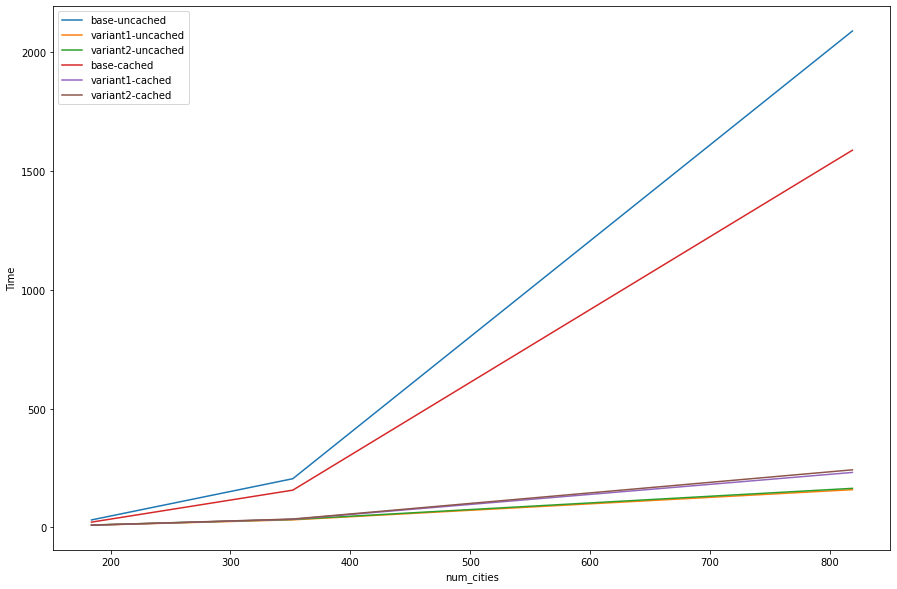

In [8]:
def get_legend_name(cached:bool, variant:str):
    cached = "cached" if cached else "uncached"
    return f"{variant}-{cached}"

def plot_mean_run_times(ax, df2):
    for key, grp in df2.groupby(['cached', 'variant']):
        n_cities = []
        times = []
        for key2, grp2 in grp.groupby('instance'):
            times.append(grp2['process_time'].mean())
            n_cities.append(grp2['instance'].min())
        ax.plot(n_cities, times, label=get_legend_name(key[0], key[1]))
df2 = get_df_replaced_with_n_cities(ncdf, cdf)
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('num_cities')
ax.set_ylabel('Time')
plot_mean_run_times(ax, df2)
ax.legend()

In [9]:
cdf, ncdf = get_all_out_files_data_as_dataframe()
df = pd.concat([cdf, ncdf])

In [10]:
def filter_df(df, instance, variant):
    df = df[df['instance'] == instance]
    df = df[df['variant'] == variant]
    return df

themap = {'inst-0':184, 'inst-13': 352, 'inst-5':819}
print("%10s %10s %15s %20s %20s" % ('instance', 'cities', 'algorithm', 'best-distance', 'mean-distance'))
print("-" * 80)
for instance, ncities in themap.items():
    for variant in ['base', 'variant1', 'variant2']:
        best_dist = filter_df(df, instance, variant)['best_distance'].min()
        mean_dist = filter_df(df, instance, variant)['best_distance'].mean()
        print("%10s %10d %15s %20f %20f" % (instance, ncities, variant, best_dist, mean_dist))

  instance     cities       algorithm        best-distance        mean-distance
--------------------------------------------------------------------------------
    inst-0        184            base       3452940.487764       3483211.185083
    inst-0        184        variant1       3504535.839959       3560954.211323
    inst-0        184        variant2       3564624.616259       3594153.936499
   inst-13        352            base       6305151.506659       6324916.083904
   inst-13        352        variant1       6364196.287549       6400748.188371
   inst-13        352        variant2       6397159.378960       6441842.628152
    inst-5        819            base      11091905.232430      11153406.098803
    inst-5        819        variant1      11302910.062155      11350439.337075
    inst-5        819        variant2      11331777.659586      11432677.888550


## Detailed Plots<a id="DetailedPlots"></a>

In [11]:
def get_color_value(l_string):
    if 'base.' in l_string:
        if '.cached' in l_string:
            return 'blue'
        else:
            return 'cyan'
    elif 'variant1.' in l_string:
        if '.cached' in l_string:
            return 'red'
        else:
            return 'magenta'
    elif 'variant2.' in l_string:
        if '.cached' in l_string:
            return 'yellow'
        else:
            return 'green'
    else:
        assert(False)
        
        
def plot_single_file(filename:str,
                        x_column:str='RunTimeSinceBeginningOfRun',
                        y_column:str='gIterations',
                        ax=None,
                        legend_str:str="",
                        x_multiplication_factor:int=1,
                        y_multiplication_factor:int=1):
    assert(None != ax)
    df = pd.read_csv(filename)
    x_axis = df[x_column].to_numpy() * x_multiplication_factor
    y_axis = df[y_column].to_numpy() * y_multiplication_factor
    ax.plot(x_axis, y_axis, label=legend_str, color=get_color_value(legend_str))
    
def plot_all_files(fig, ax, file_list, plot_type='regular', instance='inst-0',\
                      x_column:str='RunTimeSinceBeginningOfRun', y_column:str='gIterations',\
                      x_multiplication_factor:int=1, y_multiplication_factor:int=1,
                      title:str=""):
    assert(plot_type == 'regular' or plot_type == 'semilog' or plot_type == 'loglog')
    if plot_type == 'semilog' or plot_type == 'loglog':
        ax.set_xscale('log')
    if plot_type == 'loglog':
        ax.set_yscale('log')
    variants = ["base", "variant1", "variant2"]
    runs = [1, 2, 3, 4, 5]
    for variant in variants:
        for run in runs:
            file_name_pattern = f"{instance}.{variant}.{run}"
            label_string = f'{variant}.Run-{run}'
            for fname in file_list:
                if file_name_pattern in fname:
                    if 'nocache' not in fname:
                        continue
                    l_string = label_string
                    plot_single_file(fname, x_column, y_column, ax,\
                                     l_string, x_multiplication_factor,\
                                     y_multiplication_factor)
    ax.legend()
    ax.set_title(title)
    if plot_type == 'semilog' or plot_type == 'loglog':
        x_column = x_column + ' (log scale)'
        ax.set_xscale('log')
    if plot_type == 'loglog':
        y_column = y_column + ' (log scale)'
        ax.set_yscale('log')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    

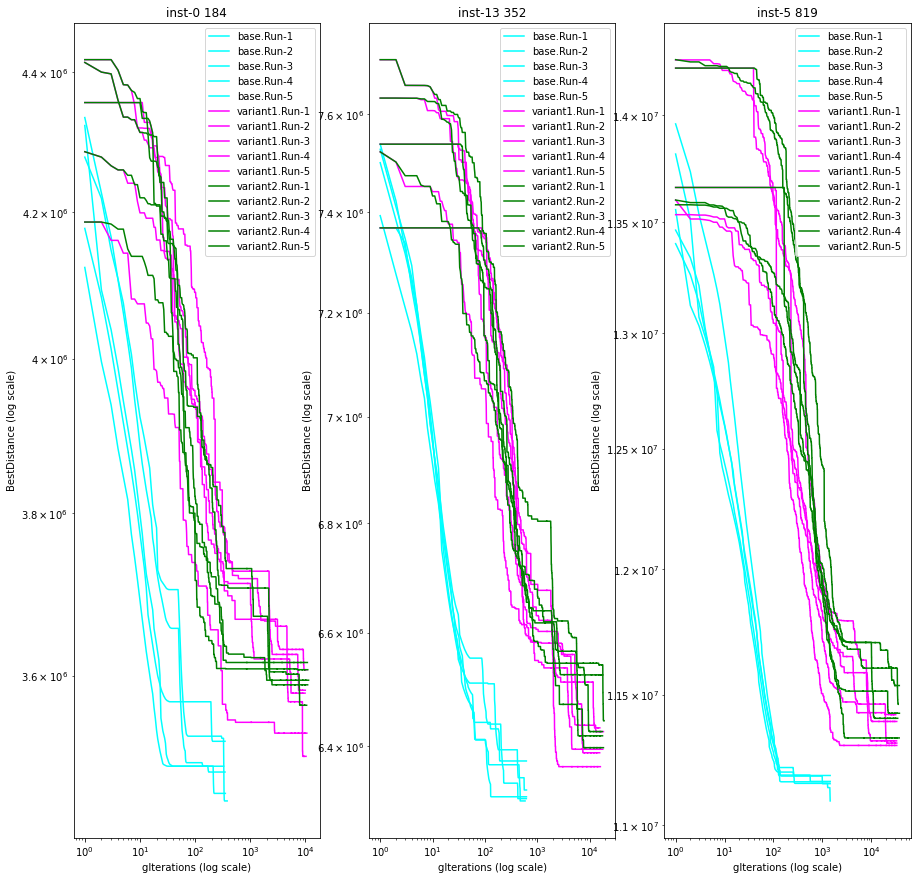

In [13]:
df = pd.read_csv(csv_files[0])
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

plot_all_files(fig=fig,\
               ax=ax[0],\
               file_list=csv_files,\
               plot_type='loglog',\
               instance='inst-0',\
               x_column='gIterations',
               y_column='BestDistance',
               x_multiplication_factor=1,
               y_multiplication_factor=1,
               title='inst-0 184')

#fig, ax = plt.subplots(figsize=(15, 15))
plot_all_files(fig=fig,\
               ax=ax[1],\
               file_list=csv_files,\
               plot_type='loglog',\
               instance='inst-13',\
               x_column='gIterations',
               y_column='BestDistance',
               x_multiplication_factor=1,
               y_multiplication_factor=1,
               title='inst-13 352')

#fig, ax = plt.subplots(figsize=(15, 15))
plot_all_files(fig=fig,\
               ax=ax[2],\
               file_list=csv_files,\
               plot_type='loglog',\
               instance='inst-5',\
               x_column='gIterations',
               y_column='BestDistance',
               x_multiplication_factor=1,
               y_multiplication_factor=1,
               title='inst-5 819')

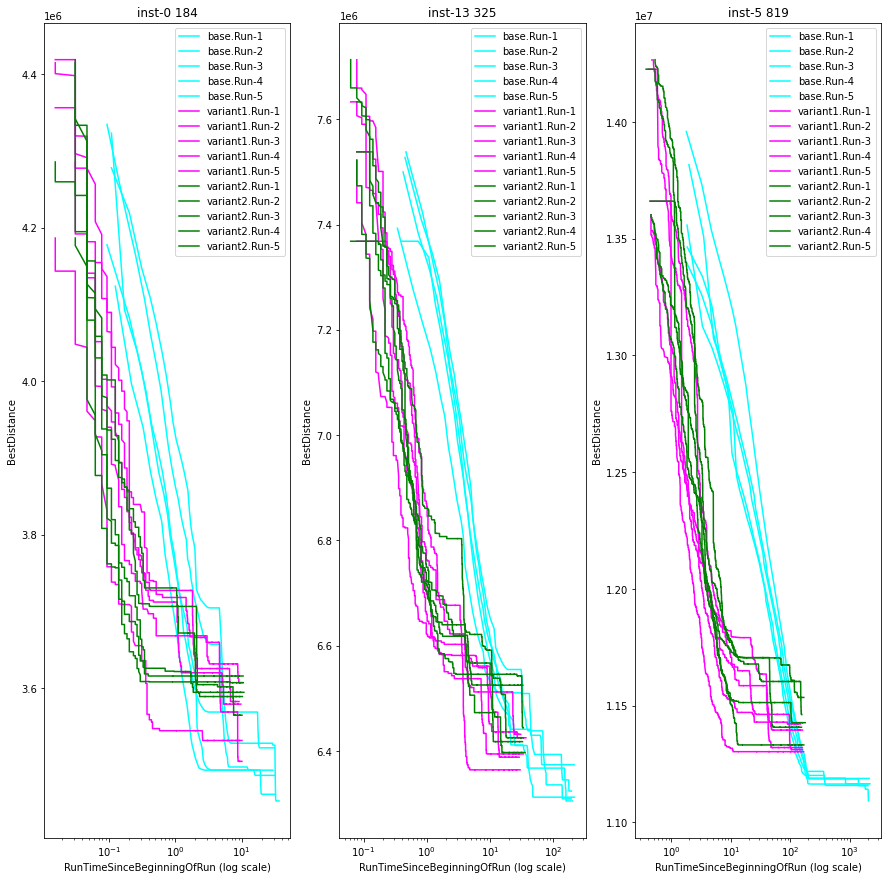

In [14]:
df = pd.read_csv(csv_files[0])
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

plot_all_files(fig=fig,\
               ax=ax[0],\
               file_list=csv_files,\
               plot_type='semilog',\
               instance='inst-0',\
               x_column='RunTimeSinceBeginningOfRun',
               y_column='BestDistance',
               x_multiplication_factor=1,
               y_multiplication_factor=1,
               title='inst-0 184')

#fig, ax = plt.subplots(figsize=(15, 15))
plot_all_files(fig=fig,\
               ax=ax[1],\
               file_list=csv_files,\
               plot_type='semilog',\
               instance='inst-13',\
               x_column='RunTimeSinceBeginningOfRun',
               y_column='BestDistance',
               x_multiplication_factor=1,
               y_multiplication_factor=1,
               title='inst-13 325')

#fig, ax = plt.subplots(figsize=(15, 15))
plot_all_files(fig=fig,\
               ax=ax[2],\
               file_list=csv_files,\
               plot_type='semilog',\
               instance='inst-5',\
               x_column='RunTimeSinceBeginningOfRun',
               y_column='BestDistance',
               x_multiplication_factor=1,
               y_multiplication_factor=1,
               title='inst-5 819')

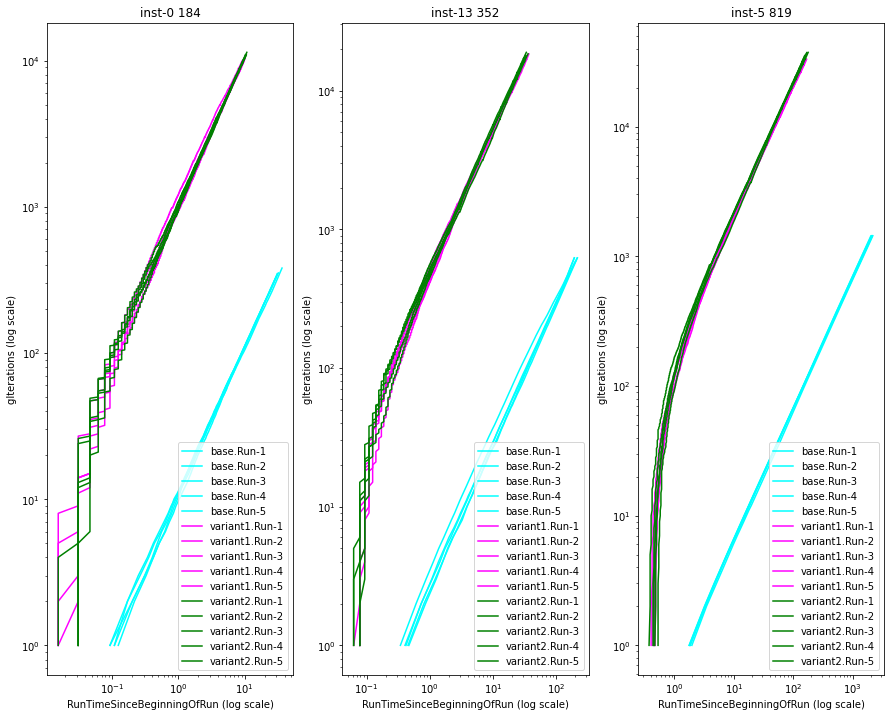

In [15]:
df = pd.read_csv(csv_files[0])
fig, ax = plt.subplots(1, 3, figsize=(15, 12))

plot_all_files(fig=fig,\
               ax=ax[0],\
               file_list=csv_files,\
               plot_type='loglog',\
               instance='inst-0',\
               x_column='RunTimeSinceBeginningOfRun',
               y_column='gIterations',
               x_multiplication_factor=1,
               y_multiplication_factor=1,
               title='inst-0 184')

#fig, ax = plt.subplots(figsize=(15, 15))
plot_all_files(fig=fig,\
               ax=ax[1],\
               file_list=csv_files,\
               plot_type='loglog',\
               instance='inst-13',\
               x_column='RunTimeSinceBeginningOfRun',
               y_column='gIterations',
               x_multiplication_factor=1,
               y_multiplication_factor=1,
               title='inst-13 352')

#fig, ax = plt.subplots(figsize=(15, 15))
plot_all_files(fig=fig,\
               ax=ax[2],\
               file_list=csv_files,\
               plot_type='loglog',\
               instance='inst-5',\
               x_column='RunTimeSinceBeginningOfRun',
               y_column='gIterations',
               x_multiplication_factor=1,
               y_multiplication_factor=1,
               title='inst-5 819')